In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from astropy    import units  as u

from common import hallmark as hm
from common import io_ipole as io
from common import viz
from common import mockservation as ms

In [2]:
pf = hm.ParaFrame(
    'test/ipole_86GHz/{mag}a{aspin:g}_w{window:d}/img_s{snapshot:d}_Rh{Rhigh:d}_i{inc:d}.h5'
)

for k in set(pf.keys()) - {'path'}:
    globals()[k] = np.unique(pf[k])
    print(k, globals()[k][:16])

window [1]
inc [10 30 50 70]
Rhigh [  1  10  40 160]
aspin [0.]
mag ['M']
snapshot [1000]


In [3]:
sel = pf(inc=70)
display(sel)

,path,mag,aspin,window,snapshot,Rhigh,inc
3,test/ipole_86GHz/Ma0_w1/img_s01000_Rh10_i70.h5,M,0.0,1,1000,10,70
7,test/ipole_86GHz/Ma0_w1/img_s01000_Rh160_i70.h5,M,0.0,1,1000,160,70
11,test/ipole_86GHz/Ma0_w1/img_s01000_Rh1_i70.h5,M,0.0,1,1000,1,70
15,test/ipole_86GHz/Ma0_w1/img_s01000_Rh40_i70.h5,M,0.0,1,1000,40,70


In [4]:
imgs = io.load_mov(sel.path)
meta = imgs.meta

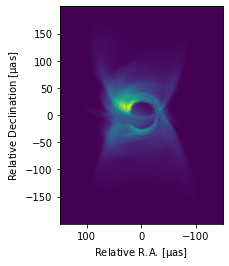

In [5]:
ax = viz.show(imgs, s=0, vmin=0)

(4, 200, 101) -6.875500e+10, 1.031325e+11


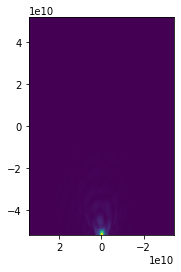

In [6]:
spec, U, V = ms.upfft(imgs, *imgs.fov.to(u.rad).value, N=200)
print(spec.shape, f'{U:e}, {V:e}')
plt.imshow(abs(spec[0,:,:].T), origin='lower', extent=[-U/2,U/2,-V/2,V/2])

(4, 64, 64) -599.999436396179 399.99962426411935


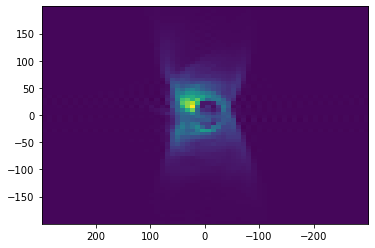

In [7]:
imgs2, width, height = ms.downifft(spec, U, V, N=64)

width  *= u.rad.to(u.uas)
height *= u.rad.to(u.uas)

print(imgs2.shape, width, height)
plt.imshow(imgs2[0,:,:].T, origin='lower', extent=[-width/2,width/2,-height/2,height/2])

(-199.99981213205967, 199.99981213205967)

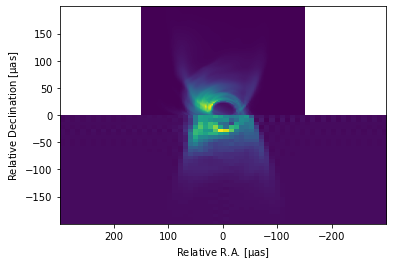

In [8]:
ax = viz.show(imgs, s=0, vmin=0)
ax.imshow(imgs2[0,:,:32].T, origin='lower', extent=[-width/2,width/2,-height/2,0])
ax.set_ylim(-height/2,height/2)